# E4 - Visualizations Part 2

#### 1. Importing libraries and data

In [250]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [251]:
# Establish preferred plotting theme for all charts in this notebook

sns.set_theme(style="ticks", palette="colorblind")

In [252]:
df = pd.read_csv('ny_city_data.csv', index_col = 0)

C:\Users\gerar\AppData\Local\Temp\ipykernel_18032\1088745411.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ny_city_data.csv', index_col = 0)


In [253]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
bike_rides_daily        int64
_merge                 object
dtype: object

In [254]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge
0,4312823B234B59BE,classic_bike,2022-01-01 15:02:49.389,2022-01-01 15:21:33.638,John St & William St,5065.04,Canal St & Rutgers St,5303.08,40.708621,-74.007222,40.714275,-73.989900,casual,2022-01-01,11.6,212,both
1,8EF3CAF2AB83D79B,classic_bike,2022-01-01 16:37:43.980,2022-01-01 16:51:24.559,Adelphi St & Myrtle Ave,4620.02,Dean St & Franklin Ave,4107.13,40.693083,-73.971789,40.677592,-73.955637,member,2022-01-01,11.6,212,both
2,E635995432E6D5E9,classic_bike,2022-01-01 17:01:09.616,2022-01-01 17:11:18.885,W 15 St & 6 Ave,5989.02,E 7 St & Avenue A,5626.07,40.738046,-73.996430,40.726218,-73.983799,casual,2022-01-01,11.6,212,both
3,3FBA2C5E4092D2FC,classic_bike,2022-01-01 17:16:25.677,2022-01-01 17:26:15.737,Carmine St & 6 Ave,5763.03,Washington Pl & 6 Ave,5838.09,40.730386,-74.002150,40.732241,-74.000264,member,2022-01-01,11.6,212,both
4,60AB4AEBCA910AF4,classic_bike,2022-01-01 03:38:26.654,2022-01-01 03:42:23.647,Greenwich St & Perry St,5922.04,Greenwich St & W Houston St,5730.08,40.734980,-74.006970,40.728846,-74.008591,member,2022-01-01,11.6,212,both


### 2. Data Wrangling

In [256]:
# Rename member_casual column for a more intuitive name
df.rename(columns= {'member_casual': 'user_type'}, inplace = True)

In [257]:
# Rename station columns 
df.rename(columns= {'start_station_name': 'start_station', 'end_station_name': 'end_station'}, inplace = True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,date,avgTemp,bike_rides_daily,_merge
0,4312823B234B59BE,classic_bike,2022-01-01 15:02:49.389,2022-01-01 15:21:33.638,John St & William St,5065.04,Canal St & Rutgers St,5303.08,40.708621,-74.007222,40.714275,-73.989900,casual,2022-01-01,11.6,212,both
1,8EF3CAF2AB83D79B,classic_bike,2022-01-01 16:37:43.980,2022-01-01 16:51:24.559,Adelphi St & Myrtle Ave,4620.02,Dean St & Franklin Ave,4107.13,40.693083,-73.971789,40.677592,-73.955637,member,2022-01-01,11.6,212,both
2,E635995432E6D5E9,classic_bike,2022-01-01 17:01:09.616,2022-01-01 17:11:18.885,W 15 St & 6 Ave,5989.02,E 7 St & Avenue A,5626.07,40.738046,-73.996430,40.726218,-73.983799,casual,2022-01-01,11.6,212,both
3,3FBA2C5E4092D2FC,classic_bike,2022-01-01 17:16:25.677,2022-01-01 17:26:15.737,Carmine St & 6 Ave,5763.03,Washington Pl & 6 Ave,5838.09,40.730386,-74.002150,40.732241,-74.000264,member,2022-01-01,11.6,212,both
4,60AB4AEBCA910AF4,classic_bike,2022-01-01 03:38:26.654,2022-01-01 03:42:23.647,Greenwich St & Perry St,5922.04,Greenwich St & W Houston St,5730.08,40.734980,-74.006970,40.728846,-74.008591,member,2022-01-01,11.6,212,both


In [258]:
df['user_type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='user_type'>

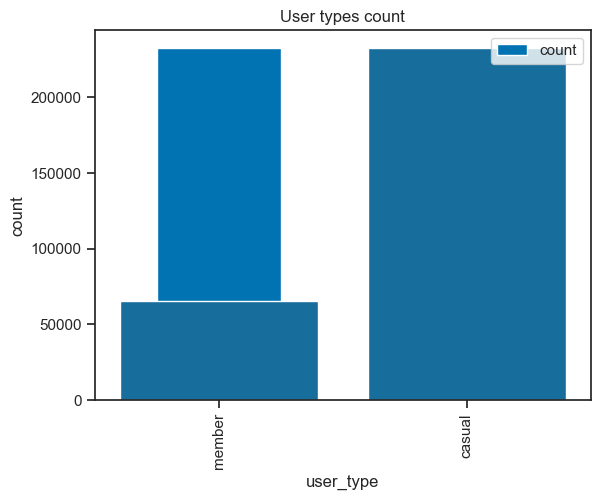

In [259]:
# Using Seaborn integrated function to count and plot the results of the counting
sns.countplot(data = df, x = 'user_type')
plt.title("User types count")
plt.show()

### Types of plots

In [261]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station',
       'start_station_id', 'end_station', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'user_type', 'date', 'avgTemp',
       'bike_rides_daily', '_merge'],
      dtype='object')

## Types of seaborn visualizations

#### Bar chart

In [264]:
df['value'] = 1

In [265]:
df_start_station_count = df.groupby('start_station')['value'].count().reset_index()

In [266]:
df_start_station_count

,start_station,value
0,1 Ave & E 110 St,197
1,1 Ave & E 16 St,679
2,1 Ave & E 18 St,693
3,1 Ave & E 30 St,453
4,1 Ave & E 39 St,516
...,...,...
1730,Wyckoff Ave & Gates Ave,163
1731,Wyckoff St & 3 Ave,2
1732,Wyckoff St & Nevins St,116
1733,Wythe Ave & Metropolitan Ave,674


In [267]:
df_end_station_count = df.groupby('end_station')['value'].count().reset_index()

In [268]:
df_end_station_count

,end_station,value
0,1 Ave & E 110 St,223
1,1 Ave & E 16 St,695
2,1 Ave & E 18 St,731
3,1 Ave & E 30 St,437
4,1 Ave & E 39 St,578
...,...,...
1741,Wyckoff Ave & Gates Ave,153
1742,Wyckoff St & 3 Ave,2
1743,Wyckoff St & Nevins St,116
1744,Wythe Ave & Metropolitan Ave,672


In [269]:
top20_start = df_start_station_count.nlargest(20, 'value')

In [270]:
top20_start

,start_station,value
1562,W 21 St & 6 Ave,1260
1692,West St & Chambers St,1198
490,Broadway & W 58 St,1122
8,1 Ave & E 68 St,1053
285,6 Ave & W 33 St,1043
456,Broadway & E 14 St,983
458,Broadway & E 21 St,961
1486,University Pl & E 14 St,955
480,Broadway & W 25 St,940
583,Cleveland Pl & Spring St,929


In [271]:
top20_end = df_end_station_count.nlargest(20, 'value')

In [272]:
top20_end

,end_station,value
1571,W 21 St & 6 Ave,1262
1703,West St & Chambers St,1234
495,Broadway & W 58 St,1125
286,6 Ave & W 33 St,1060
1496,University Pl & E 14 St,1036
8,1 Ave & E 68 St,1019
485,Broadway & W 25 St,966
461,Broadway & E 14 St,940
785,E 33 St & 1 Ave,931
463,Broadway & E 21 St,929


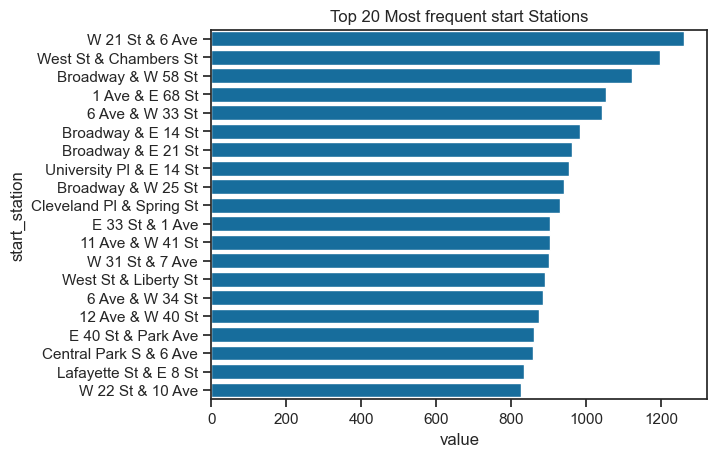

In [273]:
sns.barplot(data = top20_start, x = 'value', y = 'start_station')
plt.title("Top 20 Most frequent start Stations")
plt.show()

C:\Users\gerar\AppData\Local\Temp\ipykernel_18032\3442510295.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20_start, x = 'value', y = 'start_station', palette=("Blues_r"), hue= None)


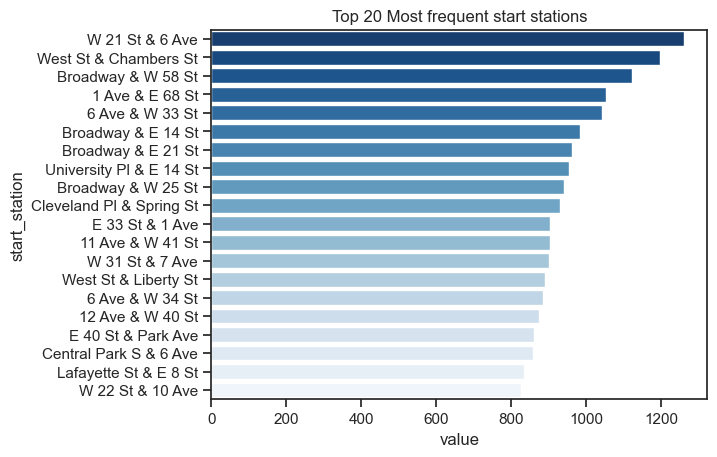

In [274]:
sns.barplot(data = top20_start, x = 'value', y = 'start_station', palette=("Blues_r"), hue= None)
plt.title("Top 20 Most frequent start stations")
plt.show()

### Line plot 

In [276]:
df.sample(n=10)

,ride_id,rideable_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,date,avgTemp,bike_rides_daily,_merge,value
129929,6511F2DC2F6F166D,classic_bike,2022-07-06 21:29:56.551,2022-07-06 22:05:26.700,West St & Chambers St,5329.03,E 25 St & 2 Ave,6046.02,40.717548,-74.013221,40.739126,-73.979738,casual,2022-07-06,26.0,1116,both,1
159927,6366B18C10765421,electric_bike,2022-08-02 06:41:00.880,2022-08-02 06:50:02.842,1 Ave & E 30 St,6079.03,W 42 St & 8 Ave,6602.05,40.741536,-73.975317,40.757570,-73.990985,member,2022-08-02,26.4,1210,both,1
275605,029A1863C4671C5C,classic_bike,2022-11-19 12:33:54.648,2022-11-19 12:45:12.510,W 26 St & 8 Ave,6297.02,11 Ave & W 41 St,6726.01,40.747348,-73.997236,40.760301,-73.998842,member,2022-11-19,2.8,576,both,1
222367,A34F839625F99720,electric_bike,2022-09-24 08:42:16.523,2022-09-24 08:51:30.602,Broadway & E 14 St,5905.12,E Houston St & Columbia St,5436.11,40.734546,-73.990741,40.719786,-73.978716,casual,2022-09-24,14.5,1153,both,1
54966,74DD26F87BB75387,classic_bike,2022-04-21 08:52:33.556,2022-04-21 08:57:20.854,E 16 St & Irving Pl,5938.11,Madison Ave & E 26 St,6131.12,40.735367,-73.987974,40.742685,-73.986713,member,2022-04-21,10.6,736,both,1
104799,45E3960F13DCC95C,classic_bike,2022-06-12 19:25:03.902,2022-06-12 19:48:40.531,E 13 St & Avenue A,5779.09,Division St & Bowery,5270.08,40.729667,-73.980680,40.714193,-73.996732,member,2022-06-12,20.5,901,both,1
87815,AFCCD5CA40105D25,classic_bike,2022-05-27 20:18:22.570,2022-05-27 20:22:37.150,S 4 St & Rodney St,5156.05,Devoe St & Lorimer St,5259.06,40.709340,-73.956080,40.713352,-73.949103,member,2022-05-27,20.2,833,both,1
161122,D24FED6C522A6F0B,classic_bike,2022-08-03 18:44:45.297,2022-08-03 18:55:42.198,Madison St & Seneca Ave,4880.11,Willoughby Ave & Onderdonk Ave,5115.05,40.701830,-73.906250,40.709800,-73.917270,member,2022-08-03,27.6,1218,both,1
154287,4A90AD26B4B226C4,classic_bike,2022-07-28 14:07:33.342,2022-07-28 14:20:31.809,W 55 St & 6 Ave,6809.09,1 Ave & E 62 St,6753.08,40.763189,-73.978434,40.761227,-73.960940,casual,2022-07-28,26.7,1151,both,1
186809,93CF2EAD59B3EF75,classic_bike,2022-08-25 07:45:26.134,2022-08-25 08:27:21.884,Lincoln Ave & E 134 St,7712.06,Lincoln Ave & E 134 St,7712.06,40.808484,-73.928803,40.808484,-73.928803,member,2022-08-25,28.1,1204,both,1


In [277]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station',
       'start_station_id', 'end_station', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'user_type', 'date', 'avgTemp',
       'bike_rides_daily', '_merge', 'value'],
      dtype='object')

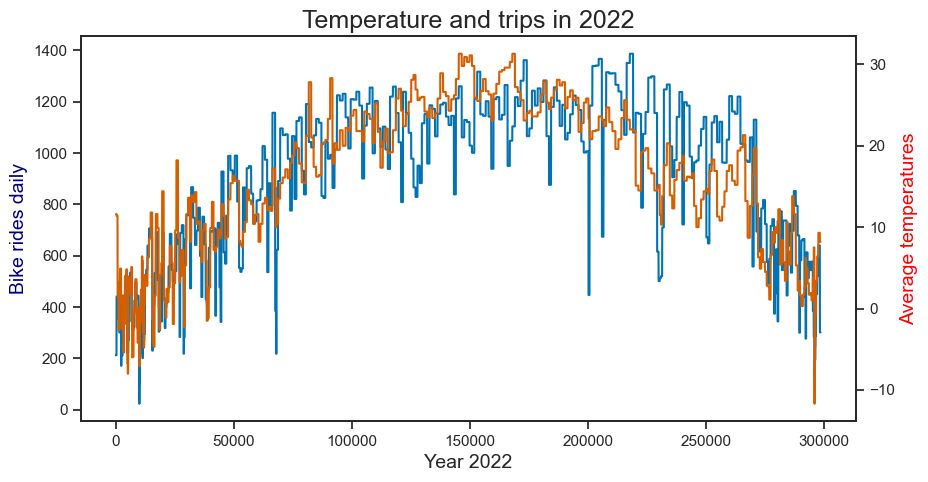

In [278]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### Box plots

C:\Users\gerar\AppData\Local\Temp\ipykernel_18032\4245224566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'green', 'electric_bike': 'yellow'})


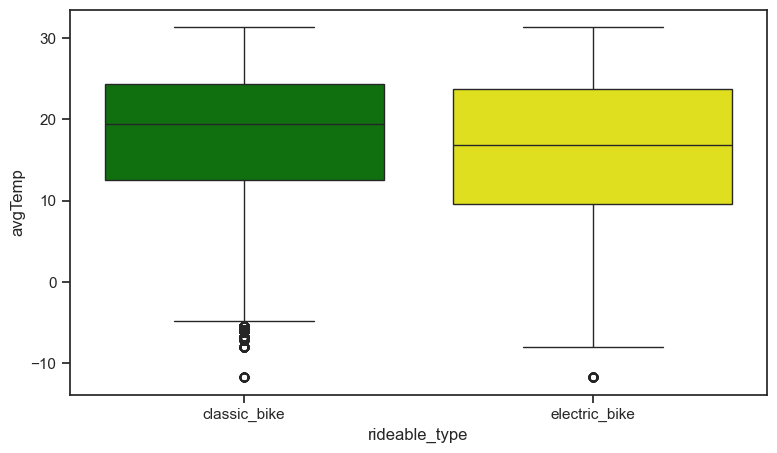

In [280]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'green', 'electric_bike': 'yellow'})
plt.show()

##### Here we can notice the relationship between the bike type and the average temperature during that day. This chart shows that when temperatures drop, users are more likely to opt for an electric bike. This could have several reasons since users want to get to their destiny faster without sweating or getting sick for example. A person may only want to enjoy a slow stride with their bike in the summer but during colder months they either don't make a ride or they opt for a less challenging alternative. 

##### Another explanation could be that electric bike users are constant during the whole year while classic bike users are more seasonal hence the temperature disparity.

### Violin plot 

C:\Users\gerar\AppData\Local\Temp\ipykernel_18032\3645505238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'green', 'electric_bike': 'yellow'})


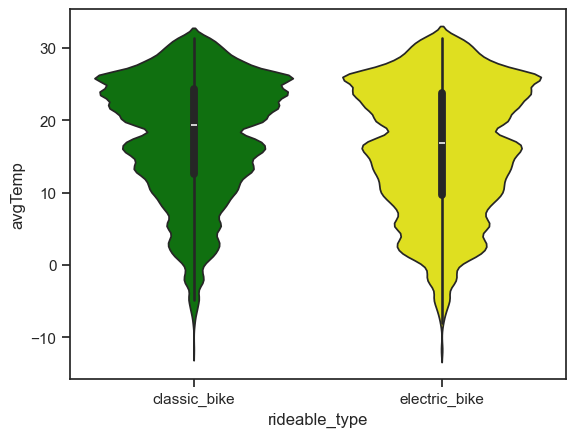

In [283]:
sns.violinplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'green', 'electric_bike': 'yellow'})
plt.show()

In [284]:
# Restore RC parameters to original settings 
sns.reset_orig()

### Heat map

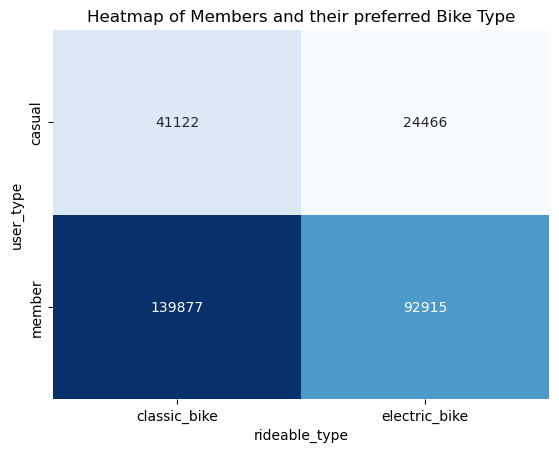

In [286]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['user_type'], df['rideable_type'])

# Plot the heatmap
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Heatmap of Members and their preferred Bike Type")
plt.show()

##### Here we can see how member rides are more common and the most common combination of is the member that rides a classic bike while the least common is the casual user that rides an electric bike. 

### FacetGrids

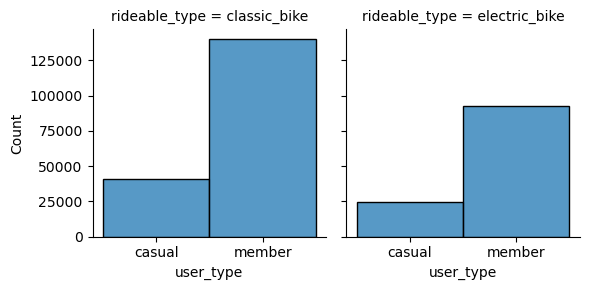

In [289]:
grid = sns.FacetGrid(df, col = "rideable_type")
grid.map(sns.histplot, "user_type", bins = 15)
plt.show()

##### The FacetGrid is a good way to visualize the differences of bike choices for either casual or member users. We can notice that there are more members overall but also that classic bikes are more common than electric bikes.

### Calculating Trip Durations

In [292]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station',
       'start_station_id', 'end_station', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'user_type', 'date', 'avgTemp',
       'bike_rides_daily', '_merge', 'value'],
      dtype='object')

In [293]:
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,date,avgTemp,bike_rides_daily,_merge,value
0,4312823B234B59BE,classic_bike,2022-01-01 15:02:49.389,2022-01-01 15:21:33.638,John St & William St,5065.04,Canal St & Rutgers St,5303.08,40.708621,-74.007222,40.714275,-73.9899,casual,2022-01-01,11.6,212,both,1


In [294]:
df['ended_at'] =  pd.to_datetime(df['ended_at'], format="%Y-%m-%d %H:%M:%S.%f")
df['started_at'] =  pd.to_datetime(df['started_at'], format="%Y-%m-%d %H:%M:%S.%f")

In [295]:
df['trip_duration'] = df['ended_at']-df['started_at']
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,date,avgTemp,bike_rides_daily,_merge,value,trip_duration
0,4312823B234B59BE,classic_bike,2022-01-01 15:02:49.389,2022-01-01 15:21:33.638,John St & William St,5065.04,Canal St & Rutgers St,5303.08,40.708621,-74.007222,40.714275,-73.989900,casual,2022-01-01,11.6,212,both,1,0 days 00:18:44.249000
1,8EF3CAF2AB83D79B,classic_bike,2022-01-01 16:37:43.980,2022-01-01 16:51:24.559,Adelphi St & Myrtle Ave,4620.02,Dean St & Franklin Ave,4107.13,40.693083,-73.971789,40.677592,-73.955637,member,2022-01-01,11.6,212,both,1,0 days 00:13:40.579000
2,E635995432E6D5E9,classic_bike,2022-01-01 17:01:09.616,2022-01-01 17:11:18.885,W 15 St & 6 Ave,5989.02,E 7 St & Avenue A,5626.07,40.738046,-73.996430,40.726218,-73.983799,casual,2022-01-01,11.6,212,both,1,0 days 00:10:09.269000
3,3FBA2C5E4092D2FC,classic_bike,2022-01-01 17:16:25.677,2022-01-01 17:26:15.737,Carmine St & 6 Ave,5763.03,Washington Pl & 6 Ave,5838.09,40.730386,-74.002150,40.732241,-74.000264,member,2022-01-01,11.6,212,both,1,0 days 00:09:50.060000
4,60AB4AEBCA910AF4,classic_bike,2022-01-01 03:38:26.654,2022-01-01 03:42:23.647,Greenwich St & Perry St,5922.04,Greenwich St & W Houston St,5730.08,40.734980,-74.006970,40.728846,-74.008591,member,2022-01-01,11.6,212,both,1,0 days 00:03:56.993000


In [296]:
df['trip_duration'].describe()

count                       298380
mean     0 days 00:17:40.243004185
std      0 days 01:16:55.617311140
min       -1 days +23:07:56.643000
25%         0 days 00:05:46.637750
50%         0 days 00:10:09.476500
75%         0 days 00:17:58.474500
max        10 days 20:27:00.031000
Name: trip_duration, dtype: object

In [297]:
# Converting time into minutes
df['trip_duration'] = df['trip_duration'].dt.total_seconds() / 60 

In [298]:
df['trip_duration'].describe()

count    298380.000000
mean         17.670717
std          76.926955
min         -52.055950
25%           5.777296
50%          10.157942
75%          17.974575
max       15627.000517
Name: trip_duration, dtype: float64

In [299]:
df = df[df['trip_duration'] < 1440]

In [300]:
df = df[df['trip_duration'] > 0]

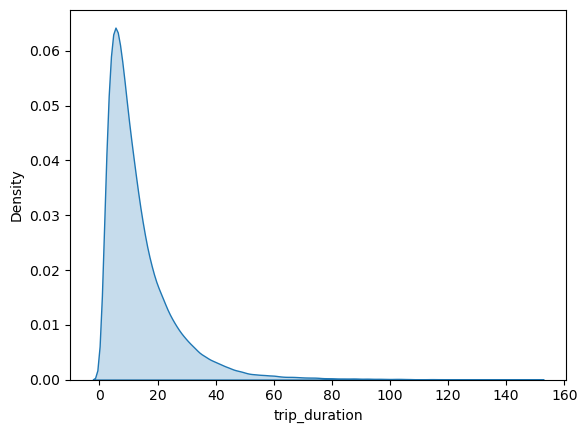

In [301]:
# Doing density plot
sns.kdeplot(df[df['trip_duration']<150]['trip_duration'], fill = True)
plt.show()

### Relationship Plots

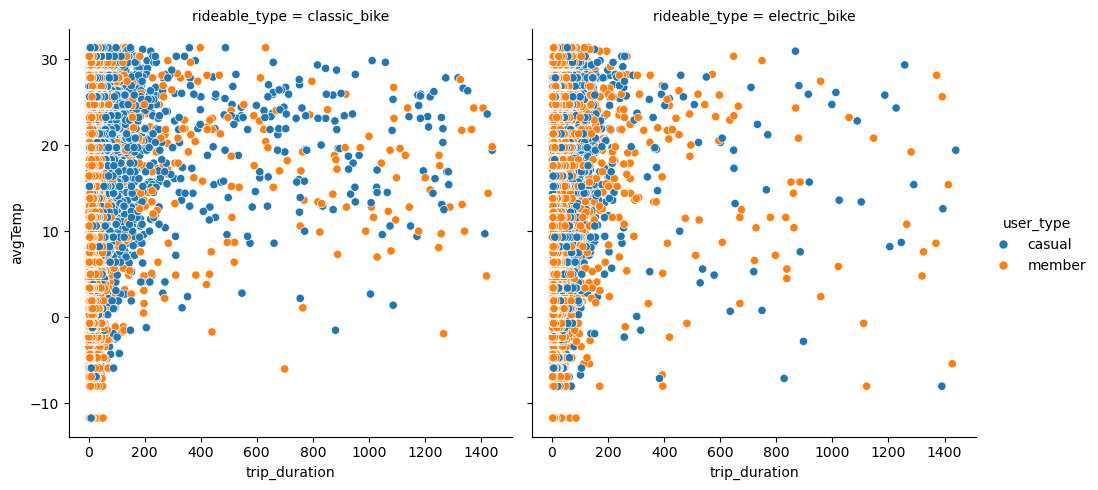

In [303]:
# "col =" argument and also row = can help to plot multiple scatterplots 

sns.relplot(data = df, x = 'trip_duration', y = 'avgTemp', hue = 'user_type', col = 'rideable_type')
plt.show()

In [304]:
df.to_csv('ny_city_modified_data.csv')